# Loading data
    this dataset has two folders, which are train and test folder. 
        train folder: 240 images
        test folder: 60 images
        four categories: apple; banana; orange; mixed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# To get training data
training_data = []
IMG_SIZE = 64        # after discussion, my team will ues 64 size only


def create_training_data():
    img_path = "Dataset/"
    train_images = img_path + "train/*.jpg"
    train_files = glob.glob(train_images)
    for img in train_files:
        img_array = cv2.imread(img)
        new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        className = os.path.basename(img)
        if className.startswith("a"):
            classes = 0
        elif className.startswith("b"):
            classes = 1
        elif className.startswith("m"):
            classes = 2
        else:
            classes = 3
        class_name = classes
        training_data.append([new_array, class_name])
            
create_training_data() 

In [ ]:
# To get test data
testing_data = []
IMG_SIZE = 64


def create_testing_data():
    img_path = "Dataset/"
    test_images = img_path + "test/*.jpg"
    test_files = glob.glob(test_images)
    for img in test_files:
        img_array = cv2.imread(img)
        new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        className = os.path.basename(img)
        if className.startswith("a"):
            classes = 0
        elif className.startswith("b"):
            classes = 1
        elif className.startswith("m"):
            classes = 2
        else:
            classes = 3
        class_name = classes
        testing_data.append([new_array, class_name])
            
create_testing_data()

In [ ]:
print(len(training_data)) # make surer that get all test data from folde
print(len(testing_data))

240
60


In [ ]:
X_train = []
Y_train = []

for features, label in training_data:
    X_train.append(features)
    Y_train.append(label)
    
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
X_test = []
Y_test = []

for features, label in testing_data:
    X_test.append(features)
    Y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(240, 64, 64, 3)
(60, 64, 64, 3)


In [ ]:
# sumarize pixel values
print(X_train.min(), X_train.max(), X_train.mean(), X_train.std())
print(X_test.min(), X_test.max(), X_test.mean(), X_test.std())

0 255 173.64740804036458 91.05258811860426
0 255 178.32617865668402 90.5112029178263


# Implementation 1
    In this implementation 

#### normalized the values by 255

In [ ]:
X_train_norm = X_train / 255
X_test_norm = X_test / 255

In [ ]:
X_train_norm

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

#### Label the values by one-hot encode the values

In [ ]:
labels = np.unique(Y_test)
labels

array([0, 1, 2, 3])

In [ ]:
num_labels = len(labels)
num_labels

4

In [ ]:
Y_train_1hot = tf.keras.utils.to_categorical(Y_train, num_labels)   # the labels must be numerical.
Y_test_1hot = tf.keras.utils.to_categorical(Y_test, num_labels)

In [ ]:
Y_train_1hot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


#### Train Model

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,   
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(5, 5),
    activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
model.add(tf.keras.layers.Dropout(rate=0.25))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))  
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [ ]:
hist = model.fit(x=X_train, y=Y_train_1hot, batch_size=16, epochs=10)

Epoch 1/10
15/15 [==============================] - 4s 209ms/step - loss: 56.7978 - accuracy: 0.4333
Epoch 2/10
15/15 [==============================] - 3s 206ms/step - loss: 1.2837 - accuracy: 0.5875
Epoch 3/10
15/15 [==============================] - 3s 204ms/step - loss: 1.0714 - accuracy: 0.6250
Epoch 4/10
15/15 [==============================] - 3s 206ms/step - loss: 1.1021 - accuracy: 0.6375
Epoch 5/10
15/15 [==============================] - 3s 208ms/step - loss: 0.8848 - accuracy: 0.6792
Epoch 6/10
15/15 [==============================] - 3s 211ms/step - loss: 0.7863 - accuracy: 0.7167
Epoch 7/10
15/15 [==============================] - 3s 206ms/step - loss: 0.7242 - accuracy: 0.7667
Epoch 8/10
15/15 [==============================] - 3s 209ms/step - loss: 0.5960 - accuracy: 0.7917
Epoch 9/10
15/15 [==============================] - 3s 211ms/step - loss: 0.5048 - accuracy: 0.8208
Epoch 10/10
15/15 [==============================] - 3s 211ms/step - loss: 0.5707 - accuracy: 0.833

#### Test the CNN model and perform evaluation

In [ ]:
loss, accuracy = model.evaluate(x=X_test, y=Y_test_1hot)

print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 0s 81ms/step - loss: 2.0388 - accuracy: 0.6333
loss = 2.0388495922088623
accuracy = 0.6333333253860474


#### Plot the loss  and accuracy

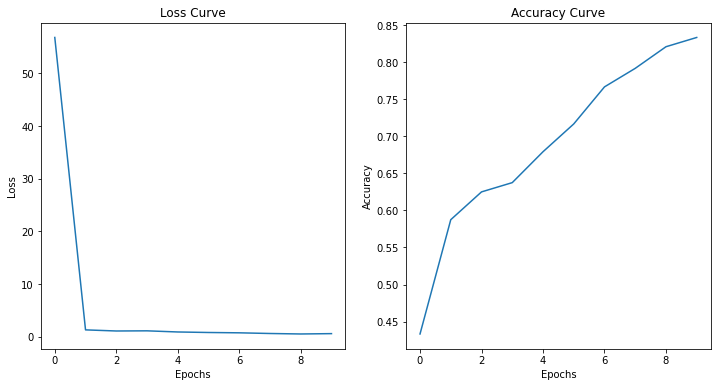

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

#### Summary
    In this implementation, the mdoel accuracy in train is 0.8333, but the accuracy in test is 0.6333, so the mdoel overfitting.
    Action to refine the model:
        (1) add more training data using image augmentation;
        (2) try to use deeper model by adding more layers.

# Implementation 2
    Using images augmentation
    Using deeper model

In [ ]:
print(X_train.shape)
print(X_test.shape)

(240, 64, 64, 3)
(60, 64, 64, 3)


#### images processing and augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

datagen.fit(X_train)

#### Label the values by one-hot encode the values

In [ ]:
labels = np.unique(Y_test)
num_labels = len(labels)
Y_train_1hot = tf.keras.utils.to_categorical(Y_train, num_labels)   # the labels must be numerical.
Y_test_1hot = tf.keras.utils.to_categorical(Y_test, num_labels)
Y_train_1hot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


### Train Model

#### Model 1

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,       # change the filters from 32 to 16
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=16,        # change the filters from 32 to 16
    kernel_size=(5, 5),
    activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
model.add(tf.keras.layers.Dropout(rate=0.25))  
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))  
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',                          
    metrics=['accuracy'])   

In [ ]:
hist = model.fit(datagen.flow(X_train, Y_train_1hot, batch_size=8), 
                 batch_size=16, 
                 epochs=20)

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 1.4099 - accuracy: 0.3667
Epoch 2/20
30/30 [==============================] - 2s 73ms/step - loss: 1.2304 - accuracy: 0.4958
Epoch 3/20
30/30 [==============================] - 2s 73ms/step - loss: 1.0061 - accuracy: 0.6167
Epoch 4/20
30/30 [==============================] - 3s 82ms/step - loss: 0.7893 - accuracy: 0.7042
Epoch 5/20
30/30 [==============================] - 3s 83ms/step - loss: 0.7119 - accuracy: 0.7583
Epoch 6/20
30/30 [==============================] - 2s 81ms/step - loss: 0.6801 - accuracy: 0.7708
Epoch 7/20
30/30 [==============================] - 2s 75ms/step - loss: 0.6822 - accuracy: 0.8000
Epoch 8/20
30/30 [==============================] - 2s 79ms/step - loss: 0.6752 - accuracy: 0.8125
Epoch 9/20
30/30 [==============================] - 2s 79ms/step - loss: 0.6084 - accuracy: 0.7750
Epoch 10/20
30/30 [==============================] - 2s 78ms/step - loss: 0.5860 - accuracy: 0.8083
Epoch 11/

##### Test the CNN model and perform evaluation

In [ ]:
loss, accuracy = model.evaluate(x=X_test, y=Y_test_1hot)

print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 0s 43ms/step - loss: 179.2069 - accuracy: 0.7833
loss = 179.20687866210938
accuracy = 0.7833333611488342


##### Plot the loss  and accuracy

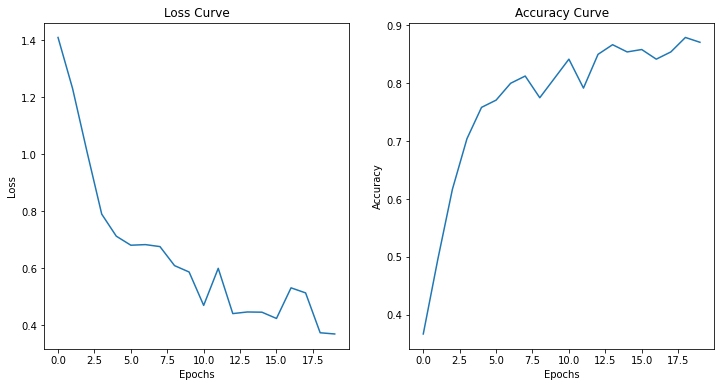

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

### Model 2  

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3, 3), 
                                 input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(16, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, (5, 5)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',                          
    metrics=['accuracy'])      

In [ ]:
hist = model.fit(datagen.flow(X_train, Y_train_1hot, batch_size=8), 
                 batch_size=16, 
                 epochs=25)

Epoch 1/25
30/30 [==============================] - 1s 28ms/step - loss: 1.2597 - accuracy: 0.4333
Epoch 2/25
30/30 [==============================] - 1s 29ms/step - loss: 0.8941 - accuracy: 0.6500
Epoch 3/25
30/30 [==============================] - 1s 33ms/step - loss: 0.7141 - accuracy: 0.7333
Epoch 4/25
30/30 [==============================] - 1s 28ms/step - loss: 0.6243 - accuracy: 0.7750
Epoch 5/25
30/30 [==============================] - 1s 31ms/step - loss: 0.6342 - accuracy: 0.8125
Epoch 6/25
30/30 [==============================] - 1s 28ms/step - loss: 0.6730 - accuracy: 0.8208
Epoch 7/25
30/30 [==============================] - 1s 28ms/step - loss: 0.4990 - accuracy: 0.8542
Epoch 8/25
30/30 [==============================] - 1s 28ms/step - loss: 0.5231 - accuracy: 0.8250
Epoch 9/25
30/30 [==============================] - 1s 28ms/step - loss: 0.4921 - accuracy: 0.8625 0s - loss: 0.4430 - accura
Epoch 10/25
30/30 [==============================] - 1s 30ms/step - loss: 0.4911 -

##### Test the CNN model and perform evaluation

In [ ]:
loss, accuracy = model.evaluate(x=X_test, y=Y_test_1hot)

print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 0s 22ms/step - loss: 136.4954 - accuracy: 0.8667
loss = 136.4954071044922
accuracy = 0.8666666746139526


##### Plot the loss  and accuracy

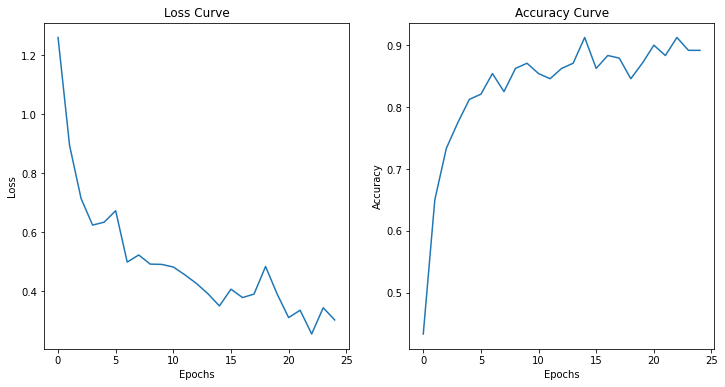

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

#### Summary
    In this implementation, the mdoel accuracy in train is 0.9167, but the accuracy in test is 0.85, so the mdoel is  still overfitting.
    Action to refine the model:
        (1) add more training data using image augmentation;
        (2) try to use deeper model by adding more layers to improve the accuracy of the model.

# Implementation 3
    Adding more images augmentation

In [ ]:
print(X_train.shape)
print(X_test.shape)

(240, 64, 64, 3)
(60, 64, 64, 3)


#### images augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

datagen.fit(X_train)

#### Label the values by one-hot encode the values

In [ ]:
labels = np.unique(Y_test)
num_labels = len(labels)
Y_train_1hot = tf.keras.utils.to_categorical(Y_train, num_labels)   # the labels must be numerical.
Y_test_1hot = tf.keras.utils.to_categorical(Y_test, num_labels)
Y_train_1hot

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],


### Trian Model

### **some finding from VGG16:**
VGG16:

images: 224 * 224 * 3

model layers information: 

    Cov2D: 224 * 224 * 64 = 3211264                                 
    Cov2D: 112 * 112 *128 = 1605632
    Cov2D: 56 * 56 * 256 = 802816
    Cov2D: 28 * 28 *512 = 401408
    Cov2D: 14 * 14 *512 = 100352
    Cov2D: 7 * 7 *512 = 25088
    flatten: 
    Dense: 1 * 1 * 4096 = 4096   (25088/4096 = 6.125)    
    Debse: 2

 My model:                             
    
images: 64 * 64 * 3

to design my model: 

    Cov2D: 64 * 64 * 16 = 65536

    test:  Cov2D: x * y * z = 32768   
    (at here I tired z = 32, x and y = 32, but the accuracy is not good, so I tired z=16, so x and y have bigger number than 32 which I expectd before. )
    real implemente:  Cov2D: 45.25483 * 45.25483 * 16 = 32768

    test:  Cov2D: x * y * z = 16384   
    (at here I tired z = 32, x and y = 22.6274, but the accuracy is not good, so I tired z=16, so x and y have bigger number than 32 which I expectd before. )
    real implemente:  Cov2D: 32 * 32 * 16 = 16384

    test:  Cov2D: x * y * z = 8192   
    (at here I tired z = 32, x and y = 45.25483, but the accuracy is not good, so I tired z=16, so x and y have bigger number than 32 which I expectd before. )
    real implemente:  Cov2D: 22.6329 * 22.6329 * 16 = 8196

    test:  Cov2D: x * y * z = 4096   
    (at here I tired z = 32, I also tired to change the kernel size to see if bigger kernal can catch more features, and that works, so I tired z=32, kernel size is 5*5. )
    real implemente:  Cov2D: 1.732 * 1.732 * 32 = 4096
    
    flatten:
    Dense: 256       (4096/256 = 16)
    Dropout:0.55
    Dense:4

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.RandomContrast(0.5)) # I tired all number between 0 to 1, and the 0.5 is the best choice for my model.
model.add(tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (0.4, 0.4),    # zoom out vertically          # I try to add images processing layers in the model to avoid overfitting.
                                                                width_factor=(0.4, 0.4),       # # zoom out horizontally
                                                                fill_mode='reflect'))  # here I use reflect, because I used nearest in the ImageGenerator.

model.add(tf.keras.layers.Conv2D(16, (3, 3),                    # if increase the filters, the accuracy will decrease.
                                 input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(16, (3, 3)))                    
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(16, (3, 3)))                    
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, (5, 5)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.55))     # xhange the dropout rate also affect the result of the model
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',                          
    metrics=['accuracy'])   

In [ ]:
hist = model.fit(datagen.flow(X_train, Y_train_1hot, batch_size=16), 
                 batch_size=16, 
                 epochs=45)

Epoch 1/45
15/15 [==============================] - 2s 33ms/step - loss: 1.3493 - accuracy: 0.3167
Epoch 2/45
15/15 [==============================] - 0s 32ms/step - loss: 1.3150 - accuracy: 0.3542
Epoch 3/45
15/15 [==============================] - 1s 33ms/step - loss: 1.2477 - accuracy: 0.4583
Epoch 4/45
15/15 [==============================] - 0s 31ms/step - loss: 1.1288 - accuracy: 0.5167
Epoch 5/45
15/15 [==============================] - 0s 32ms/step - loss: 1.0937 - accuracy: 0.5583
Epoch 6/45
15/15 [==============================] - 0s 32ms/step - loss: 1.0079 - accuracy: 0.6208
Epoch 7/45
15/15 [==============================] - 1s 33ms/step - loss: 0.8867 - accuracy: 0.6375
Epoch 8/45
15/15 [==============================] - 1s 33ms/step - loss: 0.9111 - accuracy: 0.6375
Epoch 9/45
15/15 [==============================] - 0s 32ms/step - loss: 0.8384 - accuracy: 0.6833
Epoch 10/45
15/15 [==============================] - 0s 31ms/step - loss: 0.7844 - accuracy: 0.7292
Epoch 11/

In [ ]:
loss, accuracy = model.evaluate(x=X_test, y=Y_test_1hot)

print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 1s 12ms/step - loss: 60.2530 - accuracy: 0.9333
loss = 60.25299072265625
accuracy = 0.9333333373069763


##### Plot the loss  and accuracy

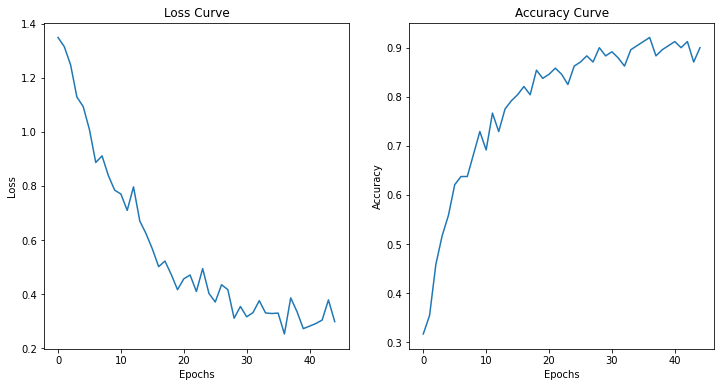

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()